<a href="https://colab.research.google.com/github/A01749373/retoTitanic/blob/main/retoTitanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reto Titanic

- *Juan Carlos Varela Tellez      A01367002*
- *Alan Eduardo Aquino Rosas      A01366912*
- *Jorge Chávez Badillo           A01749448*
- *Amy Murakami Tsutsumi          A01750185*
- *Ariadna Jocelyn Guzmán Jiménez A01749373*

## Introducción

El Titanic fue una embarcación que en el 15 de abril de 1912 durante su trayecto de Southampton, UK con destino a Nueva York, USA, se hundió después de haber chocado contra un iceberg.  
  
Se estima que entre las 2224 personas que conformaban la tripulación, 1500 murieron, convirtiéndolo en el hundimiento naval más mortal de su época.

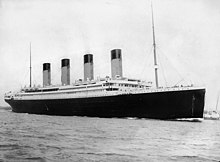

El Titanic no contaba con suficientes botes salvavidas, lo cual fue un factor importante en la mortalidad de este acontecimiento.  
  
Aunque gran parte de este evento y algunos factores de supervivencia se dieron a la suerte, hubo grupos de personas que tuvieron mas probabilidad de sobrevivir que otros.  
  
En este código se va a analizar cuáles fueron estos factores para crear un modelo de inteligencia artificial que pueda predecir el perfil de las personas que son más probables a sobrevivir este incidente.

## Lectura de Datos

In [ ]:
#Se conecta este Notebook con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Para poder leer, procesar y analizar los datos e información que sacaremos de dichos datos es necesario importar ciertas bibliotecas que nos ayudaran de forma importante: 

- Pandas: esta biblioteca nos ayuda a leer nuestros datos, al igual que modificar nuestros datos a traves de un data-frame para manipularlos y analizarlos. Para más información haz click [aquí](https://pandas.pydata.org/).
- Numpy: esta biblioteca nos da diferentes herramientas matemáticas vectorizadas para acelerar nuestros cálculos. Para más información haz click [aquí](https://numpy.org/).
- Matplotlib: esta biblioteca nos da la posibilidad de crear diferentes tipos de gráficos con mucha personalización. Para más información haz click [aquí](https://matplotlib.org/).
- Seaborn: esta biblioteca también nos da herramientas para poder graficar y visualizar datos, sin embargo, es para uso rápido ya que tiene muchas plantillas que podemos utilizar. Para más información haz click [aquí](https://seaborn.pydata.org/).
- Scikit-learn: esta biblioteca es de las más importantes que se utiliza ya que contiene la gran mayoría de herramientas de machine learning que se van a utilizar en este reto, desde regresiones hasta bosques aleatorios. Para más información haz click [aquí](https://scikit-learn.org/stable/).
- Graphviz: esta biblioteca nos ayuda a imprimir diagramas que se van a utilizar más adelante en este notebook. Para más información haz click [aquí](https://graphviz.org/).

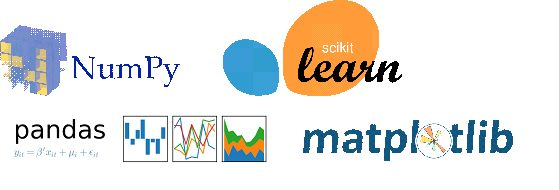

In [ ]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix 
from sklearn import tree
import graphviz

Ahora vamos a obtener nuestros datos de nuestro data-set.
Nuestro archivo ```train.csv``` tiene varios datos con su resultado (variable dependiente) que se va a utilizar para nuestro conjunto de entrenamiento y validación para los datos.  
  
Nuestro archivo ```test.csv``` tiene varios datos sin la variable independiente, lo cual nos sirve para probar nuestros modelos.  
  
Nuestro último archivo ```gender_submission.csv``` cuenta con el género de las personas.


In [ ]:
path = "/content/drive/Shareddrives/Reto Titanic/Datasets/"
df_test = pd.read_csv(path + "test.csv")
df_train = pd.read_csv(path + "train.csv")
df_gender = pd.read_csv(path + "gender_submission.csv")

## Entendimiento de los Datos

Para poder tener un mejor concepto y contexto de nuestros data-set's, es necesario saber con que características cuentan. Es por esto que debemos imprimir partes de los data-frames para saber con que estamos trabajando.

In [ ]:
print(df_test.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  


In [ ]:
print(df_train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
print(df_gender.head())

   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1


Asimismo, es importante checar siempre que haya, la documentación del data-set que vamos a estar utilizando: 

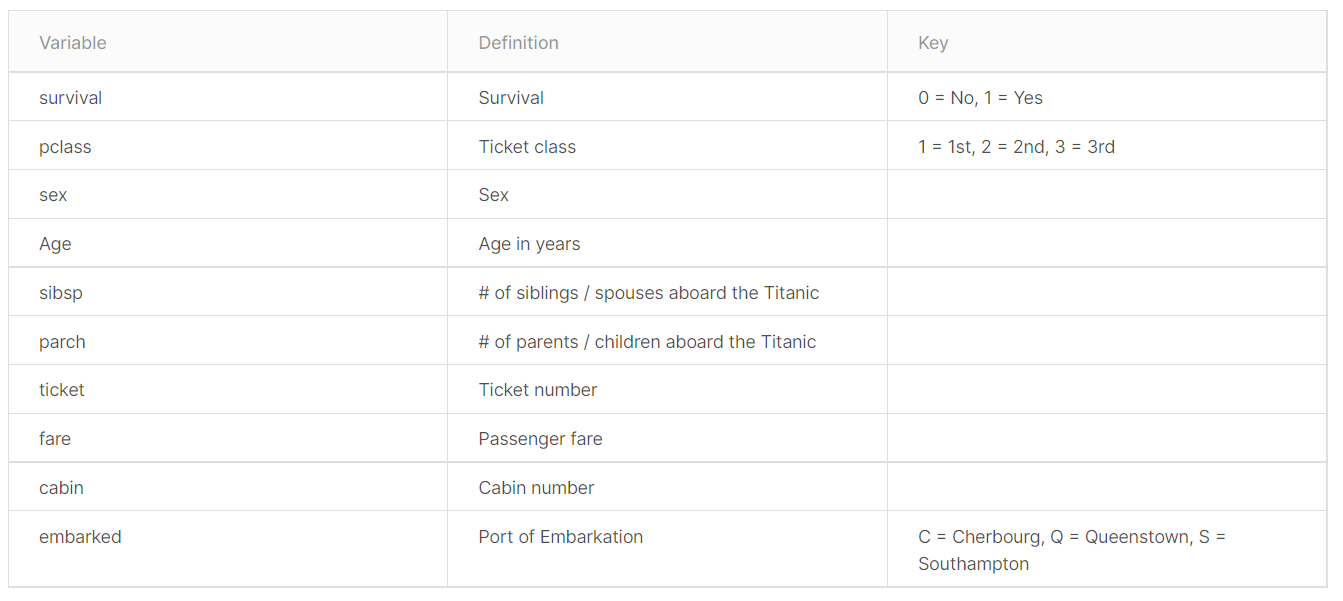

Ya que pudimos visualizar nuestros datos, podemos empezar a tomar decisiones incluso empezando nuestro trayecto.  
  
Nuestro data-set ```df_gender``` es un subconjunto de nuestro data-set ```df_train``` así que podemos no utilizarlo, al menos por el momento.

### Información Sobre los Datasets

Ya que sabemos qué características contiene cada data-set, ahora nos interesa qué tipo de dato guarda en cada columna, así como saber la cantidad de NaN's que se encuentran en nuestros sets.

In [ ]:
print('-' * 20, 'df_test info', '-' * 20)
df_test.info()
print('-' * 20, 'df_train info', '-' * 20, )
df_train.info()

-------------------- df_test info --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
-------------------- df_train info --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       ----------

Nuestros data-sets se parecen bastante, contienen una combinación de datos numéricos con strings.  
  
Sin embargo, podemos ver que hay una gran cantidad de NaN's en algunas columnas, vamos a ahondar en esto:  

### Porcentaje Total de Valores Nulos

Al sacar el porcentaje y total de valores nulos, podemos empezar a tomar decisiones con contexto e informadas:

In [ ]:
# Obtenemos el total de los valores nulos y los ordenamos de mayor a menor
total = df_train.isnull().sum().sort_values(ascending=False)

# Sacamos el porcentaje de estos valores nulos
percent_1 = df_train.isnull().sum() / df_train.isnull().count()*100

# Redondeamos para poder visualizarlo y analizarlo mejor
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

# Concatenamos esta columna a la tabla
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head()

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


Hay una gran cantidad de valores nulos en nuestra característica de ```Cabin```,  unos cuantos en ```Age``` y pocos en ```Embarked```.  
  
Por ahora tendremos esa información presente ya que tenemos que seguir analizando nuestros sets.

### Estadística Descriptiva de los DF

Ahora vamos a sacar unas métricas estadísticas para poder tener aún más contexto y analizar de mejor forma nuestros datos.

In [ ]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Estas métricas nos ayudan ya que nos dan una idea de qué hacer con los datos, de dónde salieron, cuáles son los valores esperados de cada característica, etc.

### Búsqueda de Correlaciones

Esta información es mas directa a nuestros modelos de machine learning ya que un coeficiente de correlación nos indica de una forma matemática que características es más importante meter en nuestros modelos y que características no tendrán tanto peso.

In [ ]:
# Matriz de Correlación
corr = df_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<Figure size 720x720 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


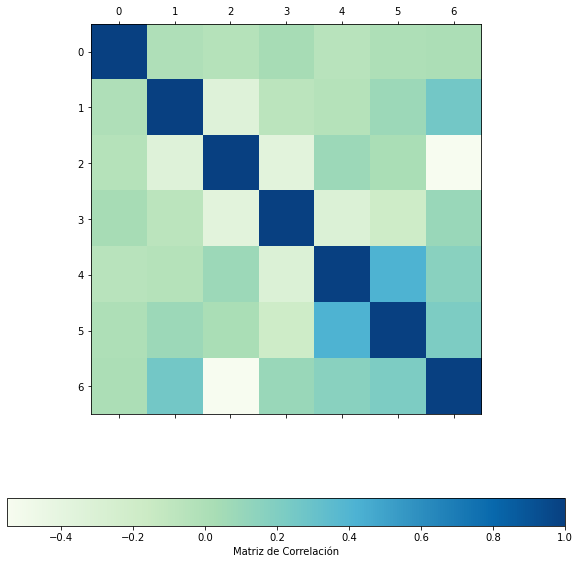

In [ ]:
# Heat Map de Correlación
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
plt.figure()
plt.matshow(corr, cmap = 'GnBu')
plt.colorbar(label='Matriz de Correlación', orientation="horizontal")
plt.show()

Podemos ver que la única característica con una correlación notable con el índice de supervivencia es el de ```Pclass```, sin embargo, hay varias otras características que no se encuentran en esta matriz. Esto es porque los índices de correlación solamente se pueden dar con características cuantitativas. Este problema se resolverá más adelante.

## Análisis Estadístico

Por último, vamos a graficar algunas características que se consideran importantes, como ```Sex``` y ```Pclass``` para tener más información con respecto a que características deberíamos meter en nuestro modelo.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Male')

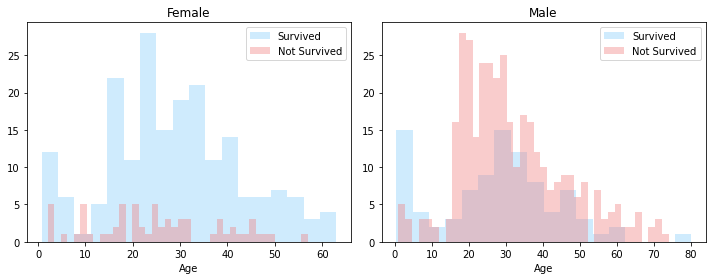

In [ ]:
survived = 'Survived'
not_survived = 'Not Survived'

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))

women = df_train[df_train['Sex'] == 'female']
men = df_train[df_train['Sex'] == 'male']

ax = sns.distplot(women[women['Survived'] == 1].Age.dropna(), bins = 18, label = survived, ax = axes[0], kde = False, color = 'lightskyblue')
ax = sns.distplot(women[women['Survived'] == 0].Age.dropna(), bins = 40, label = not_survived, ax = axes[0], kde = False, color = 'lightcoral')
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived'] == 1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False, color = 'lightskyblue')
ax = sns.distplot(men[men['Survived'] == 0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False, color = 'lightcoral')
ax.legend()
ax.set_title('Male')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


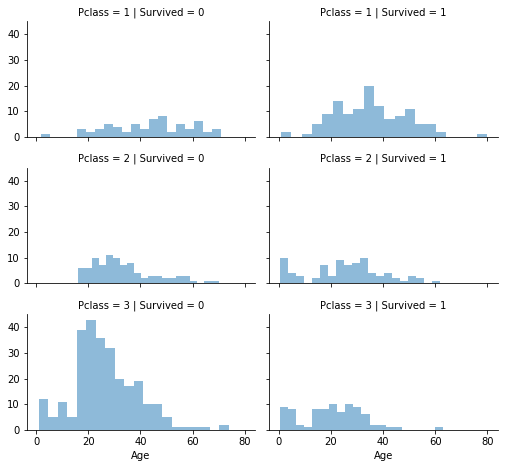

In [ ]:
grid = sns.FacetGrid(df_train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Algo que podemos observar de estas gráficas que no pudimos ver en la matriz de correlación es el gran impacto que el sexo tenía en la supervivencia dentro de este evento. Se ve una clara diferencia entre la cantidad de mujeres que sobrevivieron con respecto a los hombres. Asimismo, se ve una diferencia de supervivencia en las diferentes clases ya que un ```Pclass``` de 1 significaba "primera clase" y un ```Pclass``` de 3 representaba la clase más baja de la embarcación. Esto nos afirma la correlación negativa que podíamos observar en la matriz de correlación con el ```Pclass``` con respecto a ```Survived```.

In [ ]:
df_train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [ ]:
df_train.pivot_table('Survived', index = 'Pclass', columns = 'Sex')

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


## Limpieza de Datos

Ya que se hizo un análisis de los data-sets, ahora podemos tener una idea clara de en que consisten y cómo se recopilaron, así como poder hacer una decisión más informada en cuanto la limpieza de datos.

### Eliminando los Valores Nulos

Cuando se habla de limpieza de datos, normalmente se habla de que hacer con los valores nulos ya que no se puede hacer cálculos correctos con estos datos presentes.  
  
Antes de borrar los datos nulos, tomamos la decisión de deshacernos de unas cuantas columnas: ```PassengerId```, ```Name```, ```Ticket``` y ```Cabin```.
- ```PassengerId```: esta columna lo único que nos da es un valor único para cada pasajero, lo cual no nos es de utilidad ya que no hay relación con la problemática que vamos a resolver.
- ```Name```: al igual que la columna anterior, esta columna se va a eliminar ya que no hay una relación entre los nombres y el hecho que haya sobrevivido una persona. Si hubiera algún tipo de correlación, sería casualidad y no causalidad.
- ```Ticket```: tiene que ver exactamente con las 2 características anteriores, el número de ticket no tiene efecto en los pasajeros que si sobrevivieron y los que no.
- ```Cabin```: aunque puede llegar a ser importante saber el lugar donde pudo ser posible que se encontraran las personas al momento del hundimiento, hay tantos valores nulos (un 77% de todas las filas) que mantener la columna no es viable.  
  
Por último, hay que saber que hacer con los datos nulos que solamente algunas filas tienen.  
  
Se harán 2 cosas:  

- Se eliminarán las filas que tengan al menos 1 dato nulo para mantener de forma intacta la integridad de los datos
- Se completarán esos datos nulos con el promedio de la característica. En caso de ser una característica cualitativa, se completará con la moda de la característica.
  
Se harán estos 2 procesos para comparar modelos y ver cuál modelo generaliza de mejor manera.

#### Train Dataset

In [ ]:
# Data-set train
# Eliminacion de columnas
df_train_clean = df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
# Eliminacion de filas con datos nulos
df_train_clean_noNaN = df_train_clean.dropna()

# Data-set test
# Eliminacion de columnas
df_test_clean = df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
# Eliminacion de filas con datos nulos
df_test_clean_noNaN = df_test_clean.dropna()

### Preprocesamiento

Ya que tenemos datos limpios, ahora tenemos que hacer algo con las variables cualitativas. Estas no nos sirven para ningún modelo a menos que las cuantifiquemos, que es justo lo que vamos a hacer.

In [ ]:
# Data-set train
# Cuantificamos la caracteristica 'Pclass'
dummy_pclass = pd.get_dummies(df_train_clean_noNaN['Pclass'],prefix="Class")
# Cuantificamos la caracteristica 'Embarked'
dummy_embarked = pd.get_dummies(df_train_clean_noNaN['Embarked'])
# Cuantificamos la caracteristica 'Sex'
dummy_sex = pd.get_dummies(df_train_clean_noNaN['Sex'])

# Se concatenan las nuevas columnas
df_train_clean_noNaN = pd.concat([df_train_clean_noNaN, dummy_pclass, dummy_embarked, dummy_sex], axis=1)
# Se borran las columnas redundantes
df_train_clean_noNaN = df_train_clean_noNaN.drop(['Pclass', 'Sex', 'Embarked', 'female', 'Class_2', 'Q'], axis=1)

# Impresion del nuevo data-frame
print(df_train_clean_noNaN.head())

# Data-set test
# Cuantificamos la caracteristica 'Pclass'
dummy_pclass = pd.get_dummies(df_test_clean_noNaN['Pclass'],prefix="Class")
# Cuantificamos la caracteristica 'Embarked'
dummy_embarked = pd.get_dummies(df_test_clean_noNaN['Embarked'])
# Cuantificamos la caracteristica 'Sex'
dummy_sex = pd.get_dummies(df_test_clean_noNaN['Sex'])

# Se concatenan las nuevas columnas
df_test_clean_noNaN = pd.concat([df_test_clean_noNaN, dummy_pclass, dummy_embarked, dummy_sex], axis=1)
# Se borran las columnas redundantes
df_test_clean_noNaN = df_test_clean_noNaN.drop(['Pclass', 'Sex', 'Embarked', 'female', 'Class_2', 'Q'], axis=1)

# Impresion del nuevo data-frame
print(df_test_clean_noNaN.head())

   Survived   Age  SibSp  Parch     Fare  Class_1  Class_3  C  S  male
0         0  22.0      1      0   7.2500        0        1  0  1     1
1         1  38.0      1      0  71.2833        1        0  1  0     0
2         1  26.0      0      0   7.9250        0        1  0  1     0
3         1  35.0      1      0  53.1000        1        0  0  1     0
4         0  35.0      0      0   8.0500        0        1  0  1     1
    Age  SibSp  Parch     Fare  Class_1  Class_3  C  S  male
0  34.5      0      0   7.8292        0        1  0  0     1
1  47.0      1      0   7.0000        0        1  0  1     0
2  62.0      0      0   9.6875        0        0  0  0     1
3  27.0      0      0   8.6625        0        1  0  1     1
4  22.0      1      1  12.2875        0        1  0  1     0


Ya que tenemos todos nuestros datos cuantificados, ahora podemos tener una matriz de correlación más completa ya que podemos contar a las variables que antes eran cualitativas.

In [ ]:
corr = df_train_clean_noNaN.corr()
corr.style.background_gradient(cmap='coolwarm')

,Survived,Age,SibSp,Parch,Fare,Class_1,Class_3,C,S,male
Survived,1.000000,-0.082446,-0.015523,0.095265,0.266100,0.297908,-0.335364,0.195673,-0.159015,-0.536762
Age,-0.082446,1.000000,-0.307351,-0.187896,0.093143,0.344976,-0.309944,0.038268,-0.025431,0.099037
SibSp,-0.015523,-0.307351,1.000000,0.383338,0.139860,-0.036512,0.077060,-0.046227,0.018968,-0.106296
Parch,0.095265,-0.187896,0.383338,1.000000,0.206624,-0.013514,0.027750,-0.009523,0.013259,-0.249543
Fare,0.266100,0.093143,0.139860,0.206624,1.000000,0.596792,-0.402219,0.301337,-0.250994,-0.182457
Class_1,0.297908,0.344976,-0.036512,-0.013514,0.596792,1.000000,-0.588670,0.335545,-0.271535,-0.107152
Class_3,-0.335364,-0.309944,0.077060,0.027750,-0.402219,-0.588670,1.000000,-0.173178,0.093140,0.158446
C,0.195673,0.038268,-0.046227,-0.009523,0.301337,0.335545,-0.173178,1.000000,-0.884986,-0.103611
S,-0.159015,-0.025431,0.018968,0.013259,-0.250994,-0.271535,0.093140,-0.884986,1.000000,0.109078
male,-0.536762,0.099037,-0.106296,-0.249543,-0.182457,-0.107152,0.158446,-0.103611,0.109078,1.000000


Aquí podemos visualizar lo que observamos en el gráfico al momento de analizar los data-sets de forma estadística. El sexo tiene una correlación fuerte con el hecho de que la gente sobreviviera y no.  
  
Asimismo, la clase en la cual estaban (```Pclass```) también tiene una correlación.  
  
Por último, aunque sea leve, hay cierta correlación con el lugar en donde abordaron.  
  
Estos comportamientos creemos que se deben a 2 factores: 
- Protocolo: Al momento de una emergencia, las personas que tienen prioridad son mujeres y ninos. Aunque la edad no tiene una correlación, hay evidencia que apunta a que las mujeres tuvieron preferencia al momento de abordar botes salvavidas.
- Clases sociales: desafortunadamente, podemos deducir que se les dió prioridad a las personas con mayor capacidad adquisitiva, aquellos que se encontraban en primera clase y que, por consecuencia, pagaron más por su boleto.  
  
Estas inferencias son importantes ya que con esto podemos dar más peso a ciertos datos.

### Escalamiento de los datos

Ya que tenemos esta información, vamos a filtrar las columnas de ```SibSp``` y de ```Parch``` ya que no tiene correlación suficiente para mantenerlas, y si las mantenemos nuestros modelos podrían hacer overfitting al momento de entrenarlos con nuestro data-set.  

In [ ]:
# Separando Dataframes 
dt_x_noNaN = df_train_clean_noNaN.drop(['Survived', 'SibSp', 'Parch'], axis=1)
dt_y_noNaN = df_train_clean_noNaN['Survived']

Ya que se filtraron las últimas columnas, lo que necesitamos hacer es escalar nuestros datos. Debido a la naturaleza de los métodos de optimización, a nuestros modelos les es más fácil encontrar un convergencia cuando se escalan los datos.

In [ ]:
# Escalamiento
escalador_noNaN = StandardScaler()
escalador_noNaN.fit(dt_x_noNaN)
dt_x_noNaN = pd.DataFrame(escalador_noNaN.transform(dt_x_noNaN))

### Completando Valores Nulos con Promedios y Modas

Antes de empezar a probar modelos de inteligencia artificial, debemos crear otros data-sets donde rellenemos los valores nulos con sus respectivas medias y modas.

In [ ]:
# Data-set train
# Obteniendo valores para llenar valores nulos
fill_values = {'Age': df_train_clean['Age'].mean(),
               'Embarked': df_train_clean['Embarked'].mode()[0]}
# Rellenando valores
df_train_clean_fill = df_train_clean.fillna(value=fill_values)

# Data-set test
# Obteniendo valores para llenar valores nulos
fill_values = {'Age': df_test_clean['Age'].mean(),
               'Embarked': df_test_clean['Embarked'].mode()[0],
               'Fare': df_test_clean['Fare'].mean()}
# Rellenando valores
df_test_clean_fill = df_test_clean.fillna(value=fill_values)

### Preprocesamiento

Necesitamos datos cuantitativos, no importa el data-set ni la limpieza de datos.  Es por eso que haremos el mismo proceso con estos nuevos data-frames que ya se hizo anteriormente.

In [ ]:
# Data-set train
# Cuantificamos la caracteristica 'Pclass'
dummy_pclass = pd.get_dummies(df_train_clean_fill['Pclass'],prefix="Class")
# Cuantificamos la caracteristica 'Embarked'
dummy_embarked = pd.get_dummies(df_train_clean_fill['Embarked'])
# Cuantificamos la caracteristica 'Sex'
dummy_sex = pd.get_dummies(df_train_clean_fill['Sex'])

# Se concatenan las nuevas columnas
df_train_clean_fill = pd.concat([df_train_clean_fill, dummy_pclass, dummy_embarked, dummy_sex], axis=1)
# Se borran las columnas redundantes
df_train_clean_fill = df_train_clean_fill.drop(['Pclass', 'Sex', 'Embarked', 'female', 'Class_2', 'Q'], axis=1)

# Impresion del nuevo data-frame
print(df_train_clean_fill.head())

# Data-set test
# Cuantificamos la caracteristica 'Pclass'
dummy_pclass = pd.get_dummies(df_test_clean_fill['Pclass'],prefix="Class")
# Cuantificamos la caracteristica 'Embarked'
dummy_embarked = pd.get_dummies(df_test_clean_fill['Embarked'])
# Cuantificamos la caracteristica 'Sex'
dummy_sex = pd.get_dummies(df_test_clean_fill['Sex'])

# Se concatenan las nuevas columnas
df_test_clean_fill = pd.concat([df_test_clean_fill, dummy_pclass, dummy_embarked, dummy_sex], axis=1)
# Se borran las columnas redundantes
df_test_clean_fill = df_test_clean_fill.drop(['Pclass', 'Sex', 'Embarked', 'female', 'Class_2', 'Q'], axis=1)

# Impresion del nuevo data-frame
print(df_test_clean_fill.head())

   Survived   Age  SibSp  Parch     Fare  Class_1  Class_3  C  S  male
0         0  22.0      1      0   7.2500        0        1  0  1     1
1         1  38.0      1      0  71.2833        1        0  1  0     0
2         1  26.0      0      0   7.9250        0        1  0  1     0
3         1  35.0      1      0  53.1000        1        0  0  1     0
4         0  35.0      0      0   8.0500        0        1  0  1     1
    Age  SibSp  Parch     Fare  Class_1  Class_3  C  S  male
0  34.5      0      0   7.8292        0        1  0  0     1
1  47.0      1      0   7.0000        0        1  0  1     0
2  62.0      0      0   9.6875        0        0  0  0     1
3  27.0      0      0   8.6625        0        1  0  1     1
4  22.0      1      1  12.2875        0        1  0  1     0


Ahora veremos el comportamiento y las correlaciones que hay con este nuevo data-set

In [ ]:
corr = df_train_clean_fill.corr()
corr.style.background_gradient(cmap='coolwarm')

,Survived,Age,SibSp,Parch,Fare,Class_1,Class_3,C,S,male
Survived,1.000000,-0.069809,-0.035322,0.081629,0.257307,0.285904,-0.322308,0.168240,-0.149683,-0.543351
Age,-0.069809,1.000000,-0.232625,-0.179191,0.091566,0.319916,-0.281004,0.032024,-0.019336,0.084153
SibSp,-0.035322,-0.232625,1.000000,0.414838,0.159651,-0.054582,0.092548,-0.059528,0.068734,-0.114631
Parch,0.081629,-0.179191,0.414838,1.000000,0.216225,-0.017633,0.015790,-0.011069,0.060814,-0.245489
Fare,0.257307,0.091566,0.159651,0.216225,1.000000,0.591711,-0.413333,0.269335,-0.162184,-0.182333
Class_1,0.285904,0.319916,-0.054582,-0.017633,0.591711,1.000000,-0.626738,0.296423,-0.161921,-0.098013
Class_3,-0.322308,-0.281004,0.092548,0.015790,-0.413333,-0.626738,1.000000,-0.153329,-0.015104,0.137143
C,0.168240,0.032024,-0.059528,-0.011069,0.269335,0.296423,-0.153329,1.000000,-0.782742,-0.082853
S,-0.149683,-0.019336,0.068734,0.060814,-0.162184,-0.161921,-0.015104,-0.782742,1.000000,0.119224
male,-0.543351,0.084153,-0.114631,-0.245489,-0.182333,-0.098013,0.137143,-0.082853,0.119224,1.000000


No hubo un cambio muy radical en cuanto a las correlaciones, sin embargo, es necesario probar ambos data-sets para poder saber de una forma segura cual data-set es mejor.

### Escalamiento de datos

Ya que hicimos nuestro análisis, es necesario escalar nuestros datos para que sea más fácil encontrar convergencia con los modelos.

In [ ]:
# Separando Dataframes 
dt_x_fill = df_train_clean_fill.drop(['Survived', 'SibSp', 'Parch'], axis=1)
dt_y_fill = df_train_clean_fill['Survived']

print(dt_x_fill.head())

# Escalamiento
escalador_fill = StandardScaler()
escalador_fill.fit(dt_x_fill)
dt_x_fill = pd.DataFrame(escalador_fill.transform(dt_x_fill))

    Age     Fare  Class_1  Class_3  C  S  male
0  22.0   7.2500        0        1  0  1     1
1  38.0  71.2833        1        0  1  0     0
2  26.0   7.9250        0        1  0  1     0
3  35.0  53.1000        1        0  0  1     0
4  35.0   8.0500        0        1  0  1     1


### Modularización de los data-sets

Por buena práctica, es necesario modularizar nuestro conjunto de datos en 3 partes: entrenamiento, validación y prueba.  
  
Es por esto que vamos a dividir nuestros datos:  
  
(Nuestro módulo para validación tiene de nombre 'test', esto es por el nombre de la función que estamos utilizando, sin embargo, no se refiere a las pruebas)

In [ ]:
# Separacion del data-set con datos nulos eliminados
train_x_noNaN, test_x_noNaN, train_y_noNaN, test_y_noNaN = train_test_split(dt_x_noNaN, dt_y_noNaN, 
                                                                            random_state=2)

# Separacion del data-set con datos nulos completados
train_x_fill, test_x_fill, train_y_fill, test_y_fill = train_test_split(dt_x_fill, dt_y_fill, 
                                                                            random_state=2)
#DD
train_x_fills, test_x_fills, train_y_fills, test_y_fills = train_test_split(dt_x_fill, dt_y_fill, 
                                                                            random_state=2,train_size=0.90)

## Modelos de Predicción

Ya con nuestros datos completamente limpios y preprocesados, es hora de empezar a jugar con modelos de machine learning, hiperpárametros, validaciones, etc.   
  
*(Todos nuestros modelos fueron objeto de experimento para encontrar la mejor combinacion de hiperparámetros a nuestra discrecion)*

### Regresión Logística

Empezaremos con uno de los modelos de inteligencia artificial mas sencillos, que es regresión logística, para ver qué tanto nos puede ayudar en este problema de clasificación.

In [ ]:
log_regression_noNaN = LogisticRegression(random_state = 0,
                                          solver='liblinear',
                                          multi_class='ovr')

log_regression_noNaN.fit(train_x_noNaN, train_y_noNaN)

print("My training score:", log_regression_noNaN.score(train_x_noNaN, train_y_noNaN))
print("My test score:", log_regression_noNaN.score(test_x_noNaN, test_y_noNaN))

My training score: 0.8052434456928839
My test score: 0.7696629213483146


Este modelo nos da un puntaje algo alto.  
  
Ahora probemos con el data-set que relleno sus valores nulos con promedios y modas:  

In [ ]:
log_regression_fill = LogisticRegression(random_state = 0,
                                          solver='liblinear',
                                          multi_class='ovr')

log_regression_fill.fit(train_x_fill, train_y_fill)

print("My training score:", log_regression_fill.score(train_x_fill, train_y_fill))
print("My test score:", log_regression_fill.score(test_x_fill, test_y_fill))

My training score: 0.8023952095808383
My test score: 0.7757847533632287


Este modelo fue ligeramente mejor que el primero. Esto nos empieza a indicar que eliminar datos puede no ser la mejor idea.

### Árboles de Decisión

#### Árbol de decision noNaN

Los árboles de decisión llegan a ser muy propensos al overfitting, es por esto que tenemos que experimentar mucho con los hiperparámetros con los que cuenta.  
  
Asimismo, los hiperparámetros no cuenta con una fórmula mágica para escoger los mejores, y más con los árboles de decisión, es por eso que la experimentación y llegar a un equilibrio es muy importante.

In [ ]:
# Creación del árbol
decision_tree_noNaN = tree.DecisionTreeClassifier(random_state=0,
                                                  criterion="entropy",
                                                  max_depth=8, 
                                                  min_samples_leaf=8,
                                                  min_impurity_decrease=0.002)
decision_tree_noNaN.fit(train_x_noNaN, train_y_noNaN)

print("Antes de podar", "-" * 50)
print("My training score:", decision_tree_noNaN.score(train_x_noNaN, train_y_noNaN))
print("My test score:", decision_tree_noNaN.score(test_x_noNaN, test_y_noNaN))
print("Depth", decision_tree_noNaN.tree_.max_depth)

pruning_data = decision_tree_noNaN.cost_complexity_pruning_path(train_x_noNaN, train_y_noNaN)
print("Alphas", "-" * 50)
print(pruning_data.ccp_alphas)

decision_tree_noNaN = tree.DecisionTreeClassifier(random_state=0,
                                                  criterion="entropy",
                                                  max_depth=8, 
                                                  min_samples_leaf=8,
                                                  min_impurity_decrease=0.002,
                                                  ccp_alpha=0.004)
decision_tree_noNaN.fit(train_x_noNaN, train_y_noNaN)

print("Despues de podar", "-" * 50)
print("My training score:", decision_tree_noNaN.score(train_x_noNaN, train_y_noNaN))
print("My test score:", decision_tree_noNaN.score(test_x_noNaN, test_y_noNaN))

Antes de podar --------------------------------------------------
My training score: 0.8764044943820225
My test score: 0.8033707865168539
Depth 8
Alphas --------------------------------------------------
[0.         0.00258319 0.00292713 0.00306238 0.00321891 0.00408391
 0.00410283 0.00423676 0.00441094 0.0045121  0.00548659 0.00611452
 0.00715085 0.00774828 0.00849463 0.01763532 0.02003421 0.02069422
 0.03549163 0.10656453 0.23314576]
Despues de podar --------------------------------------------------
My training score: 0.8651685393258427
My test score: 0.8089887640449438


Este modelo cuenta con un puntaje mayor al de la regresión logística.  

#### Gráficos

  
Para poder ver mejor este modelo, vamos a graficarlo con diferentes representaciones para poder visualizar mejor cómo funciona este árbol de decisión.

In [ ]:
print(tree.export_text(decision_tree_noNaN))

|--- feature_6 <= -0.28
|   |--- feature_3 <= 0.00
|   |   |--- feature_0 <= -1.11
|   |   |   |--- class: 1
|   |   |--- feature_0 >  -1.11
|   |   |   |--- feature_1 <= -0.40
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  -0.40
|   |   |   |   |--- class: 1
|   |--- feature_3 >  0.00
|   |   |--- feature_1 <= -0.26
|   |   |   |--- feature_0 <= -0.91
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  -0.91
|   |   |   |   |--- class: 0
|   |   |--- feature_1 >  -0.26
|   |   |   |--- feature_0 <= -1.39
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  -1.39
|   |   |   |   |--- class: 0
|--- feature_6 >  -0.28
|   |--- feature_0 <= -1.15
|   |   |--- feature_3 <= 0.00
|   |   |   |--- class: 1
|   |   |--- feature_3 >  0.00
|   |   |   |--- feature_1 <= -0.19
|   |   |   |   |--- class: 1
|   |   |   |--- feature_1 >  -0.19
|   |   |   |   |--- class: 0
|   |--- feature_0 >  -1.15
|   |   |--- feature_1 <= -0.16
|   |   |   |--- feature_1 <= -0.45
|   

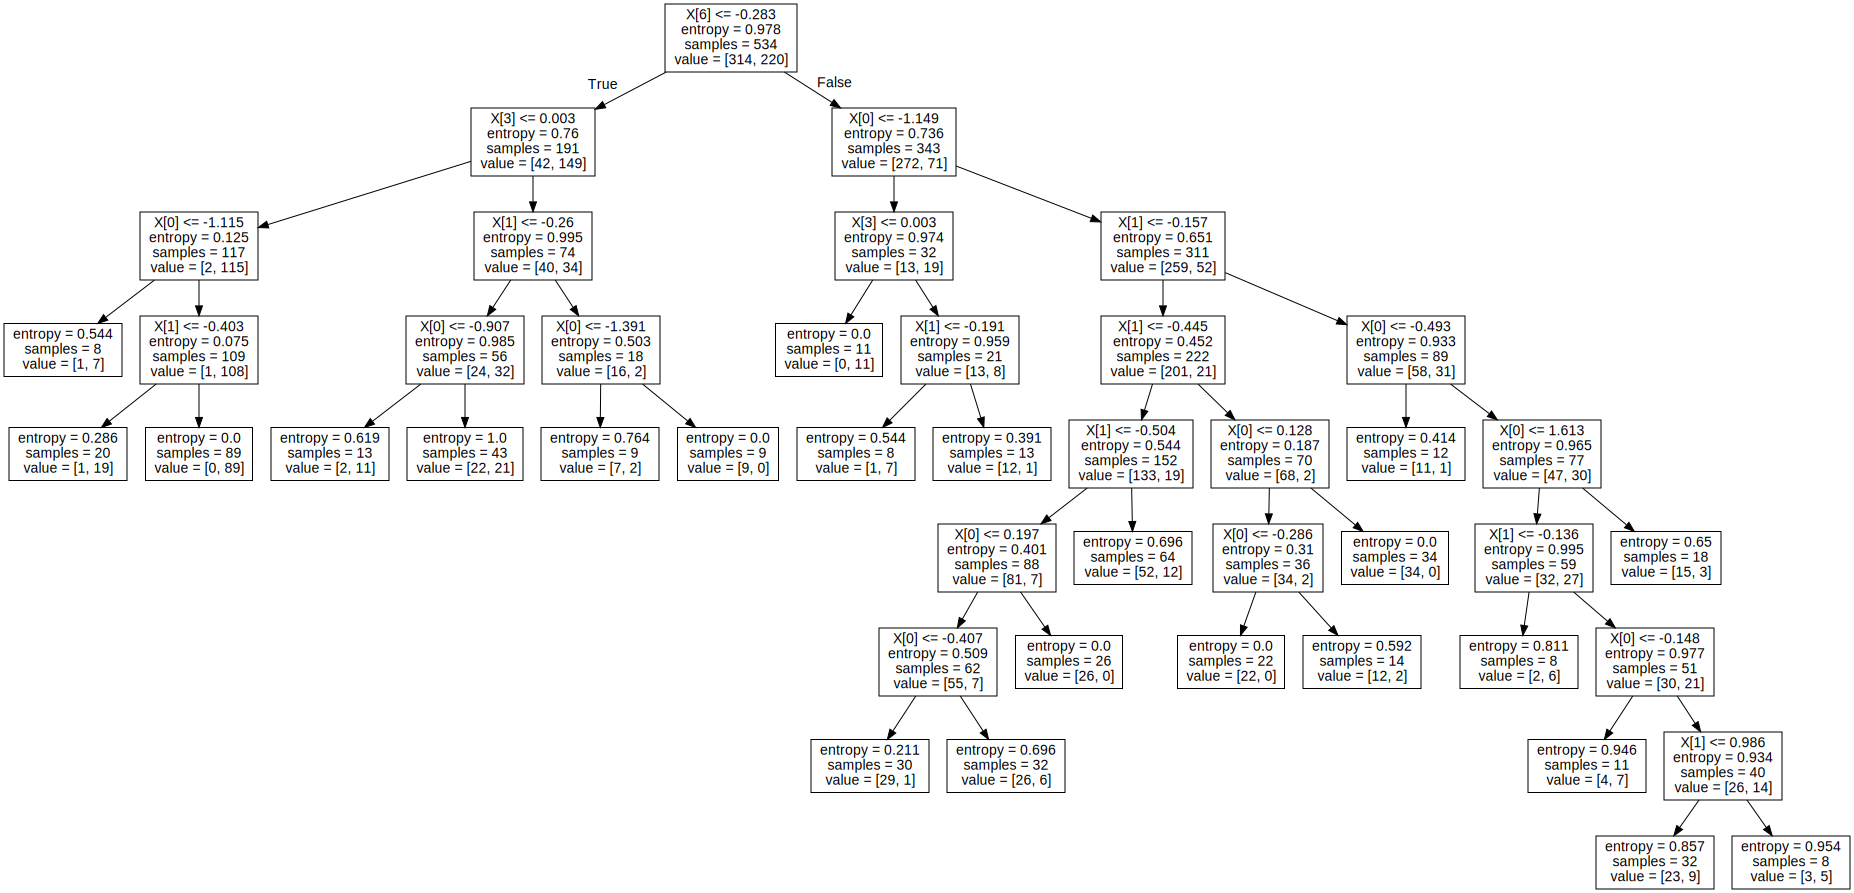

In [ ]:
decision_tree_noNaN_data = tree.export_graphviz(decision_tree_noNaN)
graph_noNaN_Data = graphviz.Source(decision_tree_noNaN_data)
graph_noNaN_Data

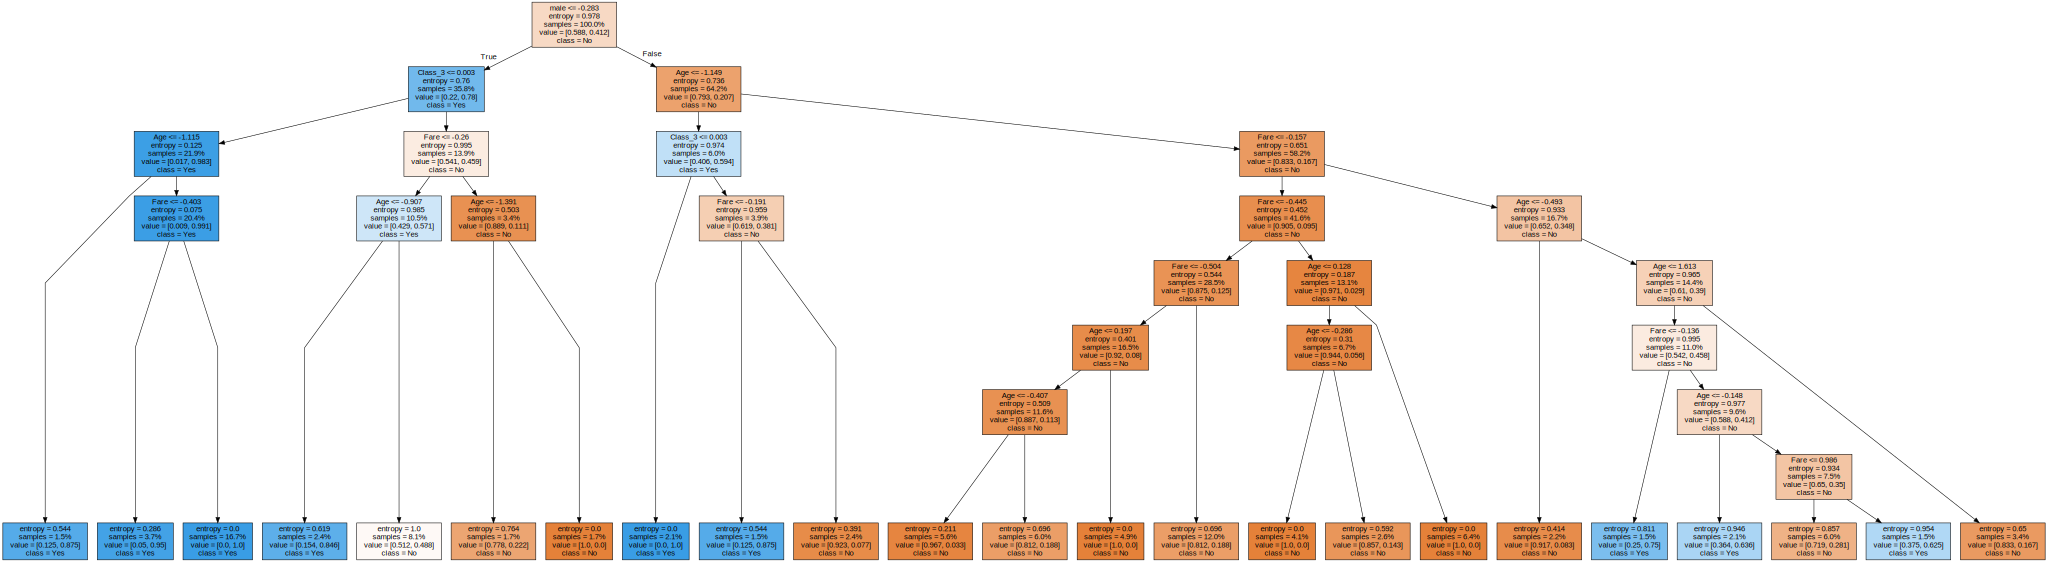

In [ ]:
feature_names = ['Age', 'Fare','Class_1', 'Class_3', 'C', 'S', 'male']
class_names = ['No','Yes']
decision_tree_noNaN_data = tree.export_graphviz(decision_tree_noNaN,feature_names=feature_names,
class_names=class_names, leaves_parallel=True,
filled=True, proportion=True, rotate=False)
graph_noNaN_Data = graphviz.Source(decision_tree_noNaN_data)
graph_noNaN_Data

#### Árbol de decision fill

Ahora probemos con nuestro otro data-set

In [ ]:
# Creación del árbol
decision_tree_fill = tree.DecisionTreeClassifier(random_state=0,
                                                 criterion="entropy",
                                                 max_depth=12,
                                                 min_samples_leaf=8)
decision_tree_fill.fit(train_x_fill, train_y_fill)

print("My training score:", decision_tree_fill.score(train_x_fill, train_y_fill))
print("My test score:", decision_tree_fill.score(test_x_fill, test_y_fill))
print("Depth", decision_tree_fill.tree_.max_depth)

pruning_data = decision_tree_fill.cost_complexity_pruning_path(train_x_fill, train_y_fill)
print("Alphas", "-" * 50)
print(pruning_data.ccp_alphas)

decision_tree_fill = tree.DecisionTreeClassifier(random_state=0,
                                                  criterion="entropy",
                                                  max_depth=12, 
                                                  min_samples_leaf=8,
                                                  ccp_alpha=0.078)
decision_tree_fill.fit(train_x_fill, train_y_fill)

print("Despues de podar", "-" * 50)
print("My training score:", decision_tree_fill.score(train_x_fill, train_y_fill))
print("My test score:", decision_tree_fill.score(test_x_fill, test_y_fill))
print("Depth", decision_tree_fill.tree_.max_depth)

# Se deja el modelo que tuvo mejor rendimiento
decision_tree_fill = tree.DecisionTreeClassifier(random_state=0,
                                                 criterion="entropy",
                                                 max_depth=12,
                                                 min_samples_leaf=8)
decision_tree_fill.fit(train_x_fill, train_y_fill)

My training score: 0.8712574850299402
My test score: 0.7892376681614349
Depth 11
Alphas --------------------------------------------------
[0.         0.00030336 0.00061297 0.00095163 0.00097284 0.00114966
 0.00143966 0.00146164 0.00159297 0.00163373 0.00206501 0.00206501
 0.00223979 0.00261153 0.00275043 0.00275795 0.0028722  0.00297619
 0.00341143 0.00341349 0.00352272 0.00432588 0.00461624 0.00484369
 0.0048816  0.00522529 0.00543569 0.00574854 0.00682777 0.00716144
 0.00785517 0.00851396 0.01712246 0.0179515  0.02162897 0.02789388
 0.07811928 0.22456154]
Despues de podar --------------------------------------------------
My training score: 0.7994011976047904
My test score: 0.7488789237668162
Depth 2


DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=8,
                       random_state=0)

Este data-set tiene un peor puntaje. Por mucho que movamos los hiperparámetros, parece posible que nuestro modelo mejore. Esto puede ser por la creación de datos que apoya al overfitting del modelo en vez de dejar los datos cómo están. 

#### Gráficos

Ahora veamos las gráficas

In [ ]:
print(tree.export_text(decision_tree_fill))

|--- feature_6 <= -0.31
|   |--- feature_3 <= -0.10
|   |   |--- feature_5 <= -0.50
|   |   |   |--- class: 1
|   |   |--- feature_5 >  -0.50
|   |   |   |--- feature_0 <= -0.17
|   |   |   |   |--- feature_0 <= -0.48
|   |   |   |   |   |--- feature_1 <= 0.42
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  0.42
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  -0.48
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  -0.17
|   |   |   |   |--- feature_1 <= -0.38
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  -0.38
|   |   |   |   |   |--- class: 1
|   |--- feature_3 >  -0.10
|   |   |--- feature_1 <= -0.19
|   |   |   |--- feature_5 <= -0.50
|   |   |   |   |--- feature_1 <= -0.34
|   |   |   |   |   |--- feature_1 <= -0.37
|   |   |   |   |   |   |--- feature_1 <= -0.49
|   |   |   |   |   |   |   |--- feature_1 <= -0.49
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- fea

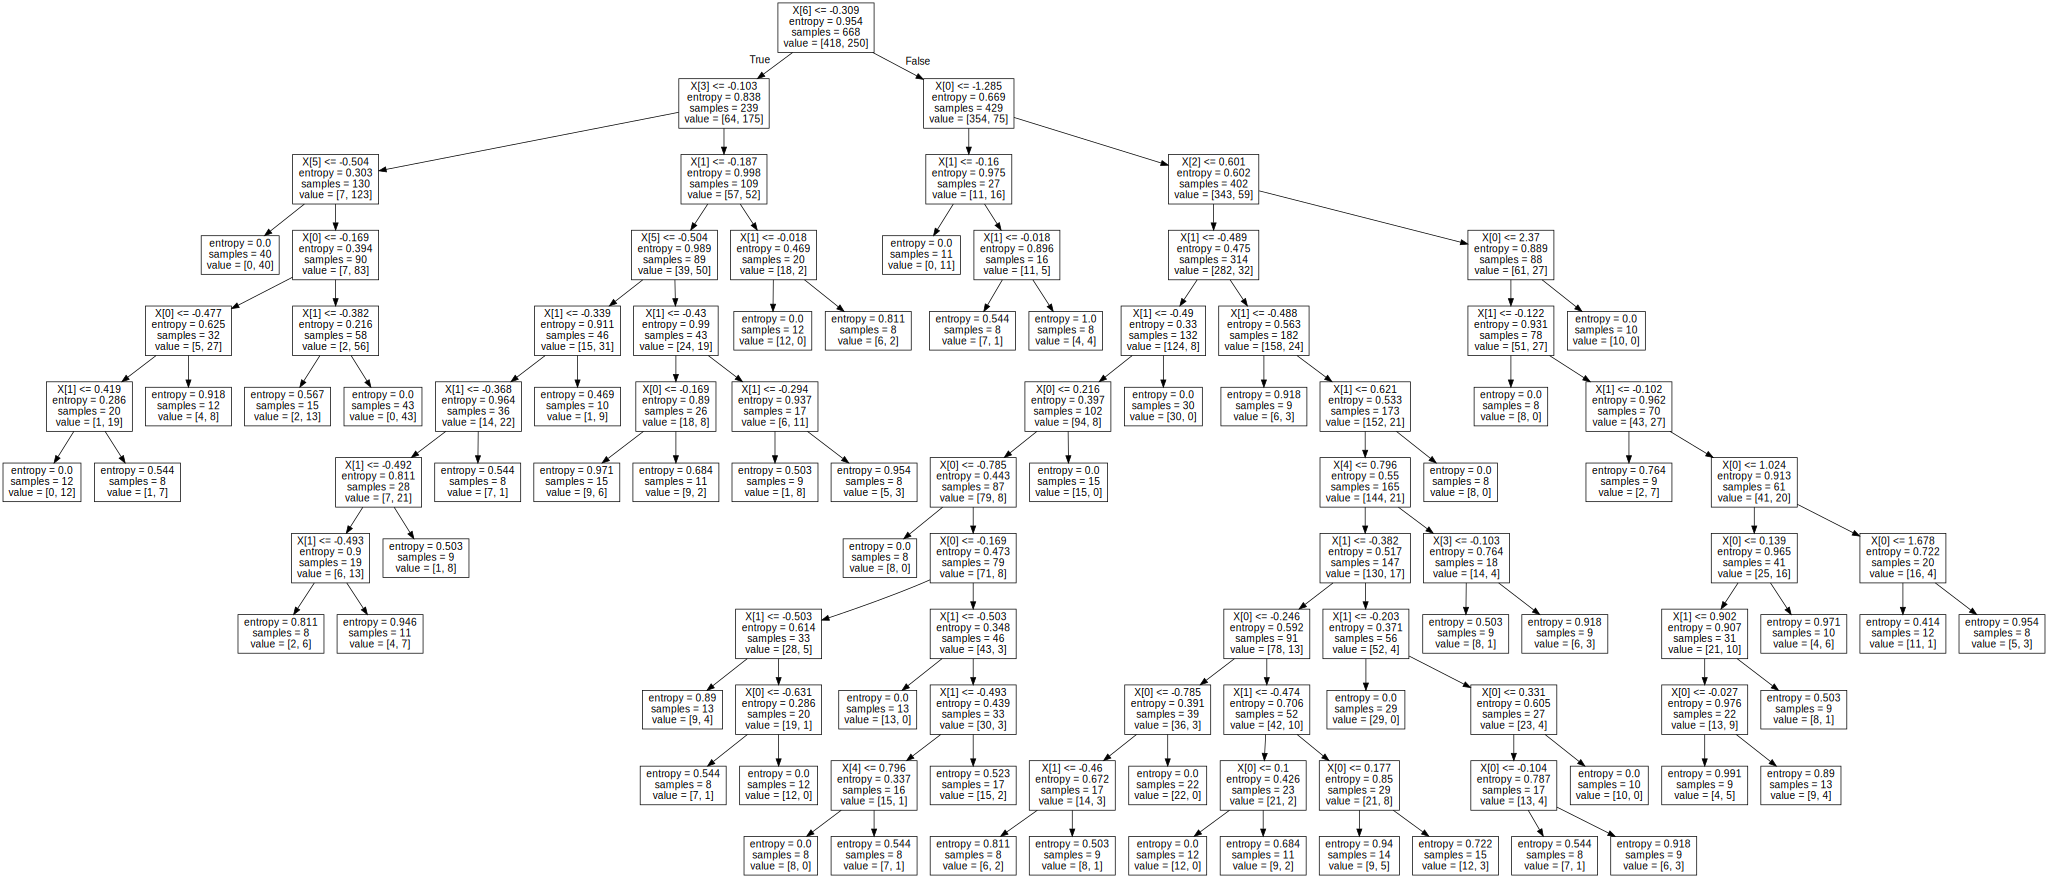

In [ ]:
decision_tree_fill_data = tree.export_graphviz(decision_tree_fill)
graph_fill_Data = graphviz.Source(decision_tree_fill_data)
graph_fill_Data

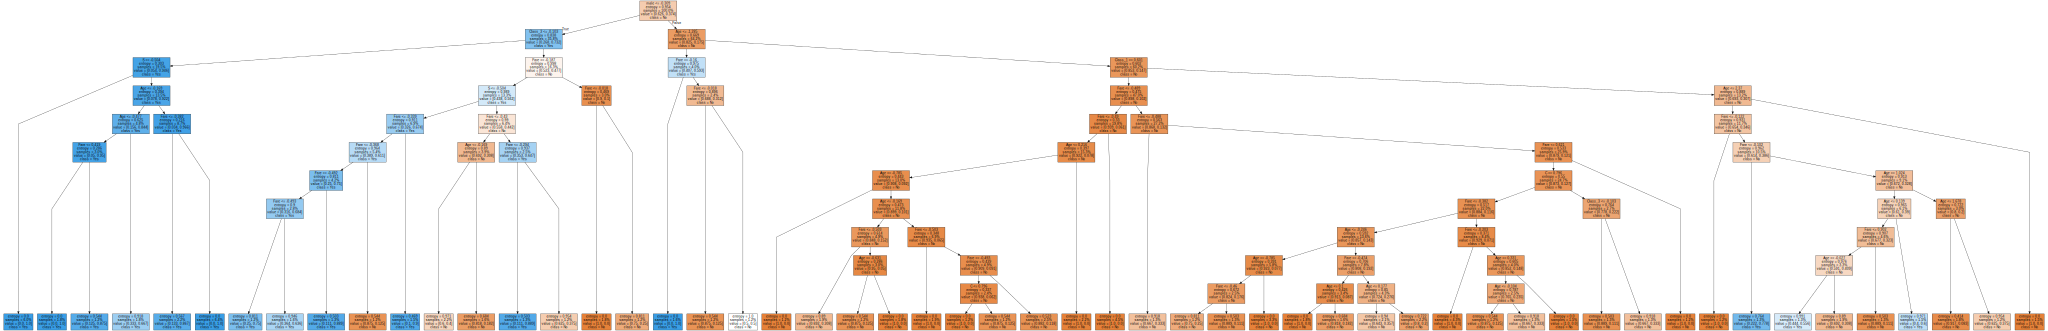

In [ ]:
decision_tree_fill_data = tree.export_graphviz(decision_tree_fill,feature_names=feature_names,
class_names=class_names, leaves_parallel=True,
filled=True, proportion=True, rotate=False)
graph_fill_Data = graphviz.Source(decision_tree_fill_data)
graph_fill_Data

### Bosques Aleatorios

Puede que un árbol de decisión no sea suficiente, así que vamos a probar con un bosque, un bosque aleatorio.

In [ ]:
random_forest_noNaN = RandomForestClassifier(random_state=0,
                                             n_estimators = 1000, 
                                             criterion="gini",
                                             max_depth=10)

random_forest_noNaN.fit(train_x_noNaN, train_y_noNaN)

print("My training score:", random_forest_noNaN.score(train_x_noNaN, train_y_noNaN))
print("My test score:", random_forest_noNaN.score(test_x_noNaN, test_y_noNaN))

My training score: 0.9737827715355806
My test score: 0.7921348314606742


Curiosamente, cuando se intenta bajar el overfitting al simplificar el modelo (min_samples_leaf más grande, alphas de poda más grandes, min_impurity_decreased más grande) también bajaba el rendimiento del modelo.  
Debido a que es un bosque y no solamente un árbol, el overfitting se "controla" hasta cierto punto ya que utiliza promedios de muchos árboles.

Ahora probemos con el otro data-set:  

In [ ]:
random_forest_fill = RandomForestClassifier(random_state=0,
                                            n_estimators = 1000, 
                                            criterion="gini",
                                            max_depth=10)

random_forest_fill.fit(train_x_fill, train_y_fill)

print("My training score:", random_forest_fill.score(train_x_fill, train_y_fill))
print("My test score:", random_forest_fill.score(test_x_fill, test_y_fill))

My training score: 0.9550898203592815
My test score: 0.8251121076233184


El mismo comportamiento se puede ver en este segundo bosque aleatorio. Justamente por el hecho que controla por sí mismo el overfitting, es mejor meter más datos, aunque sean calculados y no "verdaderos".

### Redes Neuronales

Es turno de uno de los modelos más robustos y consistentes de machine learning, las redes neuronales.
Debido a que son varios hiperparámetros, esta experimentación puede durar más de lo esperado.

In [ ]:
red_neuronal_noNaN = MLPClassifier(random_state = 1,
                                  hidden_layer_sizes = (10, 15, 10, 4),
                                  activation = "relu",
                                  verbose = False,
                                  solver = "lbfgs",
                                  learning_rate = "adaptive", 
                                  max_iter = 10000)
red_neuronal_noNaN.fit(train_x_noNaN, train_y_noNaN)
print("My training score:",red_neuronal_noNaN.score(train_x_noNaN,train_y_noNaN))
print("My test score:",red_neuronal_noNaN.score(test_x_noNaN, test_y_noNaN))

My training score: 0.9307116104868914
My test score: 0.7921348314606742


In [ ]:
red_neuronal_fill = MLPClassifier(random_state = 1,
                                  hidden_layer_sizes = (10, 15, 10, 4),
                                  activation = "relu",
                                  verbose = False,
                                  solver = "lbfgs",
                                  learning_rate = "adaptive", 
                                  max_iter = 10000)
red_neuronal_fill.fit(train_x_fill, train_y_fill)
print("My training score:",red_neuronal_fill.score(train_x_fill,train_y_fill))
print("My test score:",red_neuronal_fill.score(test_x_fill, test_y_fill))

My training score: 0.9341317365269461
My test score: 0.7757847533632287


En redes neuronales, parece que su rendimiento es mejor cuando se cortan los datos a que cuando los rellenas con medias o modas.

### Comparación de Modelos

Por último vamos a comparar matrices de confusión para poder saber de una forma más concreta cuál fue el rendimiento de cada modelo y así empezar a hacer predicciones.

In [ ]:
# Metricas de rendimiento
def metricas_rendimiento(matriz_confusion):
    exactitud = (matriz_confusion[0][0] + matriz_confusion[1][1]) / (
                matriz_confusion[0][0] + matriz_confusion[0][1] + matriz_confusion[1][0] + matriz_confusion[1][1])

    try:
        precision = matriz_confusion[0][0] / (matriz_confusion[0][0] + matriz_confusion[1][0])
    except:
        precision = 0

    exhaustividad = matriz_confusion[0][0] / (matriz_confusion[0][0] + matriz_confusion[0][1])

    try:
        puntaje_F1 = (2 * precision * exhaustividad) / (precision + exhaustividad)
    except:
        puntaje_F1 = 0

    return exactitud, precision, exhaustividad, puntaje_F1

In [ ]:
models = [log_regression_noNaN, log_regression_fill, decision_tree_noNaN, decision_tree_fill, random_forest_noNaN, random_forest_fill, red_neuronal_noNaN, red_neuronal_fill]

for i in range(0, len(models)):
  if i % 2 == 0:
    cm = confusion_matrix(test_y_noNaN, models[i].predict(test_x_noNaN)) 

  else:
    cm = confusion_matrix(test_y_fill, models[i].predict(test_x_fill)) 

  acc, prec, recall, F1_score = metricas_rendimiento(cm)

  print(cm)
  print("=============================================")
  print("Metricas de rendimiento para modelo numero", i)
  print(f"Exactitud     : {acc}")
  print(f"Precision     : {prec}")
  print(f"Exhaustividad : {recall}")
  print(f"Puntaje F1    : {F1_score}")
  print("=============================================\n")

[[89 21]
 [20 48]]
Metricas de rendimiento para modelo numero 0
Exactitud     : 0.7696629213483146
Precision     : 0.8165137614678899
Exhaustividad : 0.8090909090909091
Puntaje F1    : 0.812785388127854

[[112  19]
 [ 31  61]]
Metricas de rendimiento para modelo numero 1
Exactitud     : 0.7757847533632287
Precision     : 0.7832167832167832
Exhaustividad : 0.8549618320610687
Puntaje F1    : 0.8175182481751825

[[98 12]
 [22 46]]
Metricas de rendimiento para modelo numero 2
Exactitud     : 0.8089887640449438
Precision     : 0.8166666666666667
Exhaustividad : 0.8909090909090909
Puntaje F1    : 0.8521739130434782

[[120  11]
 [ 36  56]]
Metricas de rendimiento para modelo numero 3
Exactitud     : 0.7892376681614349
Precision     : 0.7692307692307693
Exhaustividad : 0.916030534351145
Puntaje F1    : 0.8362369337979093

[[92 18]
 [19 49]]
Metricas de rendimiento para modelo numero 4
Exactitud     : 0.7921348314606742
Precision     : 0.8288288288288288
Exhaustividad : 0.8363636363636363
Punta

Podemos observar que de los 8 modelos que se utilizaron, el que mejores métricas mostro fue el modelo de bosque aleatorio con el data-set *fill*, el que los datos nulos se llenaron con medias y modas.  
Ahora ya tenemos a nuestro modelo ganador.

## Predicciones

Ya que tenemos a un modelo ganador, ahora vamos a predecir resultados con este modelo para ver que los resultados que arroja.  
Primero es necesario filtrar las columnas que nuestro modelo no necesita.

In [ ]:
df_test_clean_noNaN = df_test_clean_noNaN.drop(['SibSp', 'Parch'], axis=1).reset_index(drop=True)

df_test_clean_fill = df_test_clean_fill.drop(['SibSp', 'Parch'], axis=1).reset_index(drop=True)

Ya filtrados nuestros data-frames, necesitamos escalarlos con el mismo proceso que realizó para el set de entrenamiento y validación al principio del proyecto.

In [ ]:
df_test_clean_noNaN_scaled = pd.DataFrame(escalador_noNaN.transform(df_test_clean_noNaN))

df_test_clean_fill_scaled = pd.DataFrame(escalador_fill.transform(df_test_clean_fill))

Ahora sacaremos las predicciones, primero con el test donde se eliminaron todos los valores nulos

In [ ]:
prediction_noNaN = pd.concat([pd.DataFrame(random_forest_fill.predict(df_test_clean_noNaN_scaled)), df_test_clean_noNaN], axis=1)

print('Predicciones del modelo ganador con test noNaN', '=' * 30)
print(prediction_noNaN.to_string())

Predicciones del modelo ganador con test noNaN ==============================
     0    Age      Fare  Class_1  Class_3  C  S  male
0    0  34.50    7.8292        0        1  0  0     1
1    0  47.00    7.0000        0        1  0  1     0
2    0  62.00    9.6875        0        0  0  0     1
3    0  27.00    8.6625        0        1  0  1     1
4    1  22.00   12.2875        0        1  0  1     0
5    0  14.00    9.2250        0        1  0  1     1
6    0  30.00    7.6292        0        1  0  0     0
7    0  26.00   29.0000        0        0  0  1     1
8    1  18.00    7.2292        0        1  1  0     0
9    0  21.00   24.1500        0        1  0  1     1
10   0  46.00   26.0000        1        0  0  1     1
11   1  23.00   82.2667        1        0  0  1     0
12   0  63.00   26.0000        0        0  0  1     1
13   1  47.00   61.1750        1        0  0  1     0
14   1  24.00   27.7208        0        0  1  0     0
15   0  35.00   12.3500        0        0  0  0     1
16  

Ahora con el set de evaluación donde se llenaron los datos nulos con medias y modas.

In [ ]:
prediction_fill = pd.concat([pd.DataFrame(random_forest_fill.predict(df_test_clean_fill_scaled)), df_test_clean_fill], axis=1)

print('Predicciones del modelo ganador con test fill', '=' * 30)
print(prediction_fill.to_string())

Predicciones del modelo ganador con test fill ==============================
     0       Age        Fare  Class_1  Class_3  C  S  male
0    0  34.50000    7.829200        0        1  0  0     1
1    0  47.00000    7.000000        0        1  0  1     0
2    0  62.00000    9.687500        0        0  0  0     1
3    0  27.00000    8.662500        0        1  0  1     1
4    1  22.00000   12.287500        0        1  0  1     0
5    0  14.00000    9.225000        0        1  0  1     1
6    0  30.00000    7.629200        0        1  0  0     0
7    0  26.00000   29.000000        0        0  0  1     1
8    1  18.00000    7.229200        0        1  1  0     0
9    0  21.00000   24.150000        0        1  0  1     1
10   0  30.27259    7.895800        0        1  0  1     1
11   0  46.00000   26.000000        1        0  0  1     1
12   1  23.00000   82.266700        1        0  0  1     0
13   0  63.00000   26.000000        0        0  0  1     1
14   1  47.00000   61.175000        1 

## Conclusión

Para poder defender cualquier modelo de inteligencia como un modelo robusto y confiable, es necesario hacer un análisis de los datos, así como probar diferentes modelos para garantizar que se está utilizando la mejor opción.